Outlier detection and removal using z-score and standard deviation in python pandas

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# We are going to use heights dataset from kaggle.com. Dataset has heights and weights both but I have removed weights to make it simple

# https://www.kaggle.com/mustafaali96/weight-height

In [6]:
df = pd.read_csv('heights.csv')
df.sample(5)

,gender,height
4364,Male,70.789698
3881,Male,71.355902
6769,Female,67.426814
4772,Male,74.677471
660,Male,68.465724


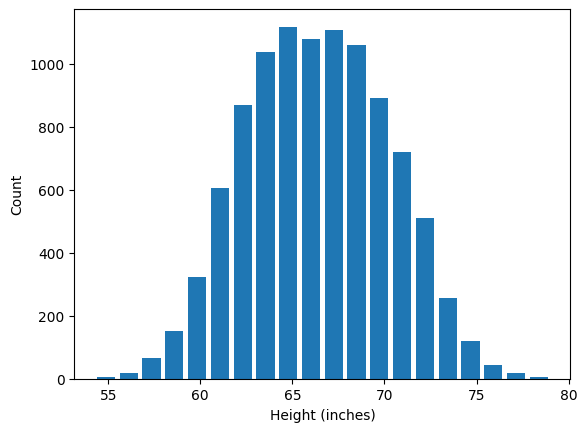

In [15]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

Read this awesome article to get your fundamentals clear on normal distribution, bell curve and standard deviation. https://www.mathsisfun.com/data/standard-normal-distribution.html

Plot bell curve along with histogram for our dataset

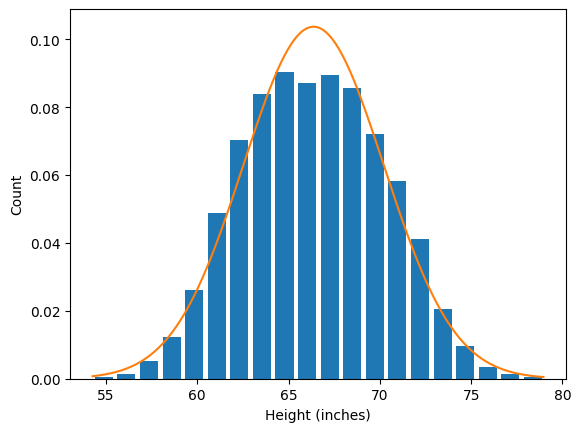

In [16]:
from scipy.stats import norm
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [17]:
df.height.mean()

np.float64(66.367559754866)

In [19]:
df.height.std()

np.float64(3.847528120795573)

Here the mean is 66.37 and standard deviation is 3.84.

(1) Outlier detection and removal using 3 standard deviation
One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [20]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

np.float64(77.91014411725271)

In [21]:
lower_limit = df.height.mean() - 3*df.height.std()
lower_limit

np.float64(54.824975392479274)

In [23]:
# Here are the outliers that are beyond 3 std dev from mean
df[(df.height < lower_limit) | (df.height > upper_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

Now remove these outliers and generate new dataframe

In [25]:
new_df = df[(df.height > lower_limit) & (df.height < upper_limit)]
new_df.sample(5)

,gender,height
3146,Male,68.041055
7998,Female,62.202404
1954,Male,76.116675
4542,Male,70.221647
6769,Female,67.426814


In [26]:
new_df.shape

(9993, 2)

Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993)

(2) Outlier detection and removal using Z Score
Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score
z = x - mean/std

In [29]:
df['zscore'] = (df.height - df.height.mean()) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [28]:
# Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean
(73.84-66.37)/3.84

1.9453124999999998

In [30]:
# Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away
df[df.zscore > 3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [31]:
df[df['zscore'] < -3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [32]:
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [33]:
# Remove the outliers and produce new dataframe
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [34]:
df_no_outliers.shape

(9993, 3)